In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_organized_sequences(filename):
  file = open(filename, 'r')
  text =file.read()
  file.close()
  return text

In [4]:
filename = '/content/drive/MyDrive/Game of Thrones - Text Generation/Code/organized_sequences.txt'
doc = load_organized_sequences(filename)
lines = doc.split('\n')

In [5]:
len(set(" ".join(lines).split(" ")))

7478

In [6]:
lines[0:3]

['we have a long ride before us gared pointed out eight days maybe nine and night is falling ser waymar royce glanced at the sky with disinterest it does that every day about this time are you unmanned by the dark gared will could see the tightness around gareds mouth the',
 'have a long ride before us gared pointed out eight days maybe nine and night is falling ser waymar royce glanced at the sky with disinterest it does that every day about this time are you unmanned by the dark gared will could see the tightness around gareds mouth the barely',
 'a long ride before us gared pointed out eight days maybe nine and night is falling ser waymar royce glanced at the sky with disinterest it does that every day about this time are you unmanned by the dark gared will could see the tightness around gareds mouth the barely sup']

# Tokenize(encode) words in lines

In [7]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [8]:
tokenizer.word_index['the']

1

In [9]:
# Seeing word mappings to corresponding indexes
print(lines[0])
print(sequences[0])
print()
print('=========================')
print(lines[1])
print(sequences[1])

we have a long ride before us gared pointed out eight days maybe nine and night is falling ser waymar royce glanced at the sky with disinterest it does that every day about this time are you unmanned by the dark gared will could see the tightness around gareds mouth the
[79, 33, 3, 96, 275, 101, 154, 534, 795, 53, 1009, 365, 718, 1075, 2, 152, 25, 761, 58, 614, 537, 517, 21, 1, 536, 19, 7476, 11, 393, 17, 263, 137, 127, 56, 103, 51, 12, 7475, 69, 1, 236, 534, 39, 47, 76, 1, 4408, 126, 4407, 330, 1]

have a long ride before us gared pointed out eight days maybe nine and night is falling ser waymar royce glanced at the sky with disinterest it does that every day about this time are you unmanned by the dark gared will could see the tightness around gareds mouth the barely
[33, 3, 96, 275, 101, 154, 534, 795, 53, 1009, 365, 718, 1075, 2, 152, 25, 761, 58, 614, 537, 517, 21, 1, 536, 19, 7476, 11, 393, 17, 263, 137, 127, 56, 103, 51, 12, 7475, 69, 1, 236, 534, 39, 47, 76, 1, 4408, 126, 4407,

In [10]:
len(tokenizer.word_index)

7478

In [11]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'to': 4,
 'of': 5,
 'he': 6,
 'his': 7,
 'was': 8,
 'her': 9,
 'in': 10,
 'it': 11,
 'you': 12,
 'had': 13,
 'i': 14,
 'she': 15,
 'him': 16,
 'that': 17,
 'as': 18,
 'with': 19,
 'said': 20,
 'at': 21,
 'not': 22,
 'for': 23,
 'on': 24,
 'is': 25,
 'but': 26,
 'they': 27,
 'no': 28,
 'my': 29,
 'from': 30,
 'were': 31,
 'all': 32,
 'have': 33,
 'jon': 34,
 'would': 35,
 'be': 36,
 'them': 37,
 'lord': 38,
 'will': 39,
 'when': 40,
 'ned': 41,
 'your': 42,
 'there': 43,
 'so': 44,
 'me': 45,
 'up': 46,
 'could': 47,
 'if': 48,
 'one': 49,
 'bran': 50,
 'are': 51,
 'what': 52,
 'out': 53,
 'like': 54,
 'man': 55,
 'this': 56,
 'been': 57,
 'ser': 58,
 'their': 59,
 'eyes': 60,
 'did': 61,
 'arya': 62,
 'back': 63,
 'looked': 64,
 'hand': 65,
 'do': 66,
 'than': 67,
 'down': 68,
 'by': 69,
 'boy': 70,
 'now': 71,
 'then': 72,
 'king': 73,
 'never': 74,
 'told': 75,
 'see': 76,
 'an': 77,
 'tyrion': 78,
 'we': 79,
 'catelyn': 80,
 'sansa': 81,
 'only': 82,


In [12]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7479

# Separating Input and Output words

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [14]:
# separate into input and output
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

In [15]:
X

array([[  79,   33,    3, ...,  126, 4407,  330],
       [  33,    3,   96, ..., 4407,  330,    1],
       [   3,   96,  275, ...,  330,    1, 1882],
       ...,
       [   1, 1161, 4298, ...,  762,   52, 1881],
       [1161, 4298,    2, ...,   52, 1881,   25],
       [4298,    2,  516, ..., 1881,   25,  456]])

In [16]:
y[0]

array([0., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [17]:
y.shape

(108159, 7479)

# Fitting the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            373950    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7479)              755379    
                                                                 
Total params: 1,280,229
Trainable params: 1,280,229
Non-trainable params: 0
_________________________________________________________________


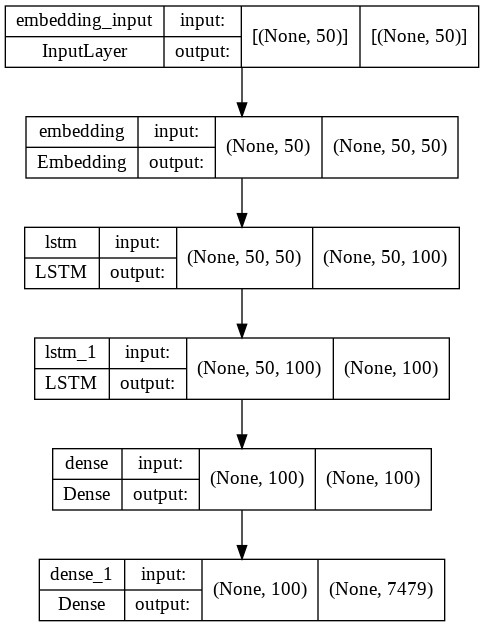

In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# summarize defined model
model.summary()
plot_model(model, to_file='/content/drive/MyDrive/Game of Thrones - Text Generation/Model Plots/model.png', show_shapes=True)


# model = Sequential()
# model.add(Embedding(vocab_size, 50, input_length=seq_length))
# model.add(Bidirectional(LSTM(512, kernel_initializer = 'he_uniform', activation='relu', return_sequences=True)))
# model.add(Bidirectional(LSTM(256, kernel_initializer = 'he_uniform', activation='relu', return_sequences=True)))
# model.add(Bidirectional(LSTM(128, kernel_initializer = 'he_uniform', activation='relu')))

# model.add(Dense(100, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))
# # compile network
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # summarize defined model
# model.summary()
# plot_model(model, to_file='../model.png', show_shapes=True)

In [19]:
my_callbacks = [
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath='../LSTM/Callbacks/model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='../LSTM/logs'),
]

In [ ]:
epochs = 450
batch_size = 512
model.fit(X,y, epochs=epochs, batch_size=batch_size)

Epoch 1/450
212/212 [==============================] - 13s 29ms/step - loss: 6.8746 - accuracy: 0.0580
Epoch 2/450
212/212 [==============================] - 6s 29ms/step - loss: 6.4821 - accuracy: 0.0602
Epoch 3/450
212/212 [==============================] - 6s 29ms/step - loss: 6.2864 - accuracy: 0.0643
Epoch 4/450
212/212 [==============================] - 6s 29ms/step - loss: 6.1497 - accuracy: 0.0715
Epoch 5/450
212/212 [==============================] - 6s 29ms/step - loss: 6.0381 - accuracy: 0.0754
Epoch 6/450
212/212 [==============================] - 6s 29ms/step - loss: 5.9461 - accuracy: 0.0780
Epoch 7/450
212/212 [==============================] - 6s 29ms/step - loss: 5.8430 - accuracy: 0.0843
Epoch 8/450
212/212 [==============================] - 6s 29ms/step - loss: 5.7471 - accuracy: 0.0926
Epoch 9/450
212/212 [==============================] - 6s 29ms/step - loss: 5.6677 - accuracy: 0.0981
Epoch 10/450
212/212 [==============================] - 6s 29ms/step - loss: 5.59

In [ ]:
# Saving the best model
import tensorflow
tensorflow.keras.models.save_model(model, '/content/drive/MyDrive/Game of Thrones - Text Generation/Model/Word2Vec-Model-{}-{}.h5'.format(epochs, batch_size))

# Generate Text

In [ ]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
  result = list()
  in_text = seed_text
  # generate a fixed number of words
  for _ in range(n_words):
    # encode the text as integer
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    # truncate sequences to a fixed length
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    # predict probabilities for each word
    yhat = model.predict(encoded, verbose=0)
    # map predicted word index to word
    #print(np.argmax(yhat))
    yhat = np.argmax(yhat)
    out_word = ''
    for word, index in tokenizer.word_index.items():
      if index == yhat:
        #print(word)
        out_word = word
        break
    # append to input
    in_text += ' ' + out_word
    result.append(out_word)
  return ' '.join(result)

In [ ]:
text = lines[600]

In [ ]:
lines[564]

In [ ]:
randomNumber = np.random.randint(0,len(lines) + 1)
n_words = 10
text = lines[randomNumber]
nextText = lines[randomNumber]

print('Text: ',text)
text = text.split(' ')
nextText = nextText.split(' ')

print('Actual Next Word:  ',text[-1])
print('Actual Next Words: ', ' '.join(nextText[1:n_words+1]))
print('===========')
text = text[0:-1]
generated_seq = generate_seq(model, tokenizer, seq_length, text, n_words)
generated_seq = generated_seq.split(' ')
print('Predicted Next Word:    ',generated_seq[0])
print('Predicted Next n_words: ', ' '.join(generated_seq[1:]))